# **Risk management**

Risk management in a payment company involves identifying, assessing, and mitigating potential threats to financial transactions, ensuring security, compliance, and continuity of services while safeguarding against fraud and financial losses.

In order to the well-functioning of the company, improving the service and driving to the success we need to understand the potential risks that may affect to our company

In the following analysis we will try to observe and study the different incidents in our system using the different information about the reimbursement dates and incidents with them.


In [26]:
import os
import numpy as np

In [27]:
import pandas as pd

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
cash = pd.read_csv("/home/somberkers/project-1-ironhack-payments-es/project_dataset_copy/extract_cash_request.csv")
nombres_columnas = cash.columns
print(nombres_columnas)
cash.head()



Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


### **Cleaning and organizing the data**

The first step in any analysis is the preparation of the information. Even if this step can be long, it is mandatory to work with the neccesary and representative data from our system

In [30]:
cash[cash['user_id'].isna()]
#even when the student cancels the account, we can retrieve the user_id from "deleted_id".
#It provides valuable info as some students deleted the account after paying back.

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
19,545,100.0,rejected,2020-01-29 13:53:03.343598+00,2020-02-08 06:21:16.156719+00,NaN,2020-01-29 14:39:11.563872+00,304.0,2020-02-28 13:53:03.343216+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
21,613,100.0,rejected,2020-02-05 17:37:56.852948+00,2020-02-08 06:21:16.15229+00,NaN,2020-02-06 12:48:09.880702+00,304.0,2020-03-08 17:37:56.842421+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
25,84,100.0,rejected,2019-12-11 07:30:42.567035+00,2020-01-10 16:58:06.837117+00,NaN,2020-01-10 16:58:06.830329+00,91.0,2020-01-10 07:30:42.567035+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23922,23989,25.0,money_back,2020-10-24 10:22:05.934286+00,2020-12-18 13:14:25.891447+00,NaN,NaN,29610.0,2020-11-03 10:22:40.194197+00,NaN,2020-11-16 02:57:54.235926+00,instant,2020-10-24 10:22:40.194197+00,completed,2020-11-13 22:40:42.99552+00,2020-11-16 02:57:54.252045+00
23925,22913,100.0,money_back,2020-10-21 22:00:18.904317+00,2020-12-18 13:11:15.976246+00,NaN,NaN,30404.0,2020-11-09 23:51:00+00,2020-10-23,2020-11-10 19:51:45.285165+00,instant,2020-10-21 22:00:45.462413+00,NaN,NaN,NaN
23929,22641,100.0,money_back,2020-10-21 00:46:36.5907+00,2020-12-18 13:15:45.384787+00,NaN,NaN,29911.0,2020-12-06 23:00:00+00,2020-10-22,2020-12-10 23:00:00+00,instant,2020-10-21 00:47:58.826568+00,NaN,NaN,NaN
23940,23832,25.0,money_back,2020-10-23 22:56:09.02721+00,2020-12-18 13:11:28.776102+00,NaN,NaN,29803.0,2020-12-04 23:00:00+00,2020-10-24,2020-12-08 23:00:00+00,instant,2020-10-23 22:56:42.839064+00,NaN,NaN,NaN


In [31]:
#Creating a subset with the necessary columns only
cash_cohort = cash[['id','user_id','amount','created_at','deleted_account_id','recovery_status','reco_creation','reco_last_update']]


#Filling missing user_ids using deleted_account_id
cash_cohort.loc['user_id'] = cash_cohort['user_id'].fillna(cash_cohort['deleted_account_id'])

#Make sure no more missing user_ids
cash_cohort.loc[cash_cohort['user_id'].isna()]



/tmp/ipykernel_20704/2006287500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_cohort.loc['user_id'] = cash_cohort['user_id'].fillna(cash_cohort['deleted_account_id'])


,id,user_id,amount,created_at,deleted_account_id,recovery_status,reco_creation,reco_last_update
7,654.0,NaN,100.0,2020-02-10 01:11:53.80827+00,309.0,NaN,NaN,NaN
8,5672.0,NaN,100.0,2020-06-28 12:06:33.71284+00,2499.0,NaN,NaN,NaN
19,545.0,NaN,100.0,2020-01-29 13:53:03.343598+00,304.0,NaN,NaN,NaN
21,613.0,NaN,100.0,2020-02-05 17:37:56.852948+00,304.0,NaN,NaN,NaN
25,84.0,NaN,100.0,2019-12-11 07:30:42.567035+00,91.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
23925,22913.0,NaN,100.0,2020-10-21 22:00:18.904317+00,30404.0,NaN,NaN,NaN
23929,22641.0,NaN,100.0,2020-10-21 00:46:36.5907+00,29911.0,NaN,NaN,NaN
23940,23832.0,NaN,25.0,2020-10-23 22:56:09.02721+00,29803.0,NaN,NaN,NaN
23966,25243.0,NaN,50.0,2020-10-27 14:41:25.73491+00,30367.0,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00


In [32]:
nombres_columnas = cash_cohort.columns
print(nombres_columnas)

Index(['id', 'user_id', 'amount', 'created_at', 'deleted_account_id',
       'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')


The success rate is high; the majority of our operations conclude successfully. Payments are reimbursed without incident, and our service functions smoothly.

### **Measuring the importance of these indicators in the total functioning of the company**  
The proper functioning of the payment and reimbursement system is important, so we must take into account the possible factors that affect said operation. The control and resolution of incidents is one of those factors.


In [33]:
conteo_reco = cash_cohort['recovery_status'].value_counts()
print(conteo_reco)

total_reco = cash_cohort['recovery_status'].count()
print(total_reco)
#the amount of incidents based on the recovery status

total_filas = cash_cohort['user_id'].count()
print(total_filas)

no_incident = total_filas - total_reco
print(no_incident)
#total amount without any incident


recovery_status
completed               2468
pending                  845
pending_direct_debit      16
cancelled                  1
Name: count, dtype: int64
3330
21867
18537


In [34]:
porcentaje_reco = (conteo_reco / total_filas) * 100
print(porcentaje_reco)

suma_porcentajes = porcentaje_reco.sum()
print(suma_porcentajes)
#the % of incidents

recovery_status
completed               11.286413
pending                  3.864270
pending_direct_debit     0.073170
cancelled                0.004573
Name: count, dtype: float64
15.228426395939088


**Incident recoveries represent almost 14% of the total of requests**

recovery_status
completed               74.114114
pending                 25.375375
pending_direct_debit     0.480480
cancelled                0.030030
Name: count, dtype: float64


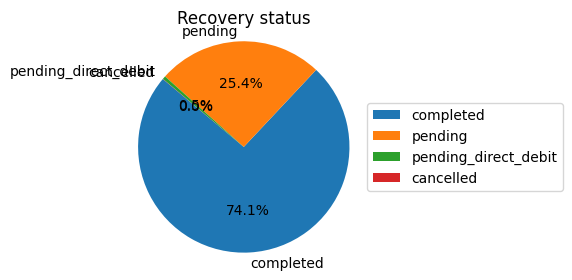

In [35]:
porcentaje_recov = (conteo_reco / total_reco) * 100
print(porcentaje_recov)

plt.figure(figsize=(3, 3))
patches, texts, autotexts = plt.pie(porcentaje_recov, labels=porcentaje_recov.index, autopct='%1.1f%%', startangle=140)
plt.title('Recovery status')
plt.axis('equal') 

plt.legend(patches, porcentaje_recov.index, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [36]:
agrupado = cash_cohort.groupby('recovery_status')['user_id'].count() 
print(agrupado)
#now we can see how users with payment problems are grouped, these are the different options and the amount of them

recovery_status
cancelled                  1
completed               2294
pending                  829
pending_direct_debit      16
Name: user_id, dtype: int64


### **Transforming data into manageable information** 

In [37]:
#Now we can look at the average time between the recovery being created and the last update time (as per the lexique, we can understand this as the closure time for the incident)
#convert 'reco_last_update' and 'reco_creation' to datetime format


cash_cohort['reco_last_update'] = pd.to_datetime(cash_cohort['reco_last_update'])
cash_cohort['reco_creation'] = pd.to_datetime(cash_cohort['reco_creation'])



cash_cohort = cash_cohort.dropna(subset=['reco_last_update', 'reco_creation'])

#we set a reimbursament range to check the time spend in resolving the incidents
cash_cohort['reimbursement_range'] = (cash_cohort['reco_last_update'] - cash_cohort['reco_creation']).dt.days
print(cash_cohort.dtypes)

print(cash_cohort[['reco_last_update', 'reco_creation']].head())




id                                 float64
user_id                            float64
amount                             float64
created_at                          object
deleted_account_id                 float64
recovery_status                     object
reco_creation          datetime64[ns, UTC]
reco_last_update       datetime64[ns, UTC]
reimbursement_range                  int64
dtype: object
                    reco_last_update                    reco_creation
5   2020-07-06 03:36:03.030904+00:00 2020-06-12 22:27:04.837525+00:00
11  2020-06-03 05:11:35.319122+00:00 2020-05-29 21:21:01.362364+00:00
72  2020-09-18 07:45:25.761696+00:00 2020-06-12 22:30:08.558561+00:00
84  2020-04-22 08:21:38.000390+00:00 2020-04-15 20:50:30.312191+00:00
141 2020-08-11 22:27:58.255621+00:00 2020-08-11 22:27:55.367849+00:00


/tmp/ipykernel_20704/1478915124.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_cohort['reco_last_update'] = pd.to_datetime(cash_cohort['reco_last_update'])
/tmp/ipykernel_20704/1478915124.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_cohort['reco_creation'] = pd.to_datetime(cash_cohort['reco_creation'])


In [38]:
correlation = cash_cohort['reimbursement_range'].corr(cash_cohort['amount'])
print("Correlation", correlation)

#values almost 0 shows no correlations


Correlation 0.11455838690087314


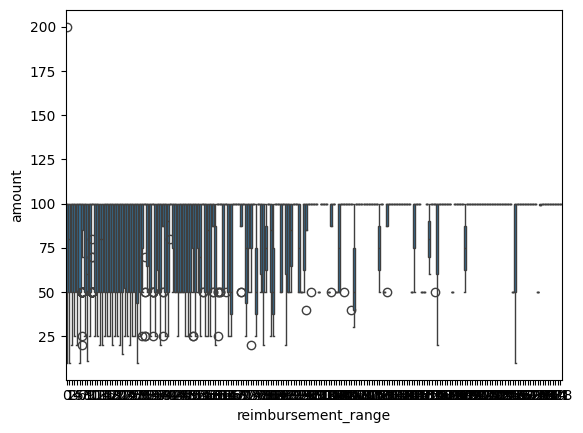

In [39]:
#Boxplot
sns.boxplot(x='reimbursement_range', y='amount', data=cash_cohort)
plt.show()


In [40]:
cash_cohort.head
nom_columnas_cohort = cash_cohort.columns
print(nom_columnas_cohort)

Index(['id', 'user_id', 'amount', 'created_at', 'deleted_account_id',
       'recovery_status', 'reco_creation', 'reco_last_update',
       'reimbursement_range'],
      dtype='object')


In [41]:
print(cash_cohort.columns)

correlation = cash_cohort['reimbursement_range'].corr(cash_cohort['amount'])
print("Coeficiente de correlación:", correlation)

Index(['id', 'user_id', 'amount', 'created_at', 'deleted_account_id',
       'recovery_status', 'reco_creation', 'reco_last_update',
       'reimbursement_range'],
      dtype='object')
Coeficiente de correlación: 0.11455838690087314


In [42]:
risk_cohort = cash_cohort[['user_id','amount','recovery_status','reimbursement_range']] #now, we want to check the average time in days for solving incidents
risk_cohort.head()

,user_id,amount,recovery_status,reimbursement_range
5,9489.0,100.0,completed,23
11,778.0,100.0,completed,4
72,10503.0,100.0,completed,97
84,4411.0,100.0,completed,6
141,23328.0,100.0,pending,0


In [43]:
#erase the cancelled status as it is only 1 record for it
filtered_risk_cohort = risk_cohort[risk_cohort['recovery_status'] != 'cancelled']


promedio_tiempo_resolucion = filtered_risk_cohort.groupby('recovery_status')['reimbursement_range'].mean()


print(promedio_tiempo_resolucion)
#we can see in days the average time per recovery status


recovery_status
completed               19.008509
pending                 39.815385
pending_direct_debit    86.000000
Name: reimbursement_range, dtype: float64


NameError: name 'recovery_status' is not defined

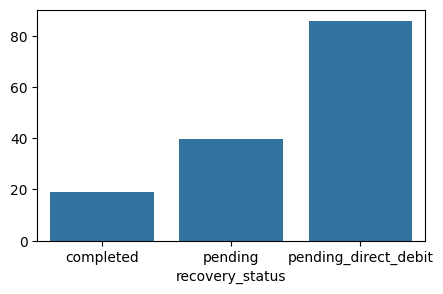

In [44]:
plt.figure(figsize=(5, 3))
sns.barplot(x=promedio_tiempo_resolucion.index, y=promedio_tiempo_resolucion.values)
plt.bar(recovery_status, promedio_tiempo_resolucion, color=['green', 'orange', 'red'])

plt.xlabel('Recovery status')
plt.ylabel('Average closure time')
plt.show()

In [45]:

average_amount = cash_cohort.groupby('recovery_status')['amount'].mean()

print("Average amount per",average_amount)


Average amount per recovery_status
cancelled               100.000000
completed                79.032010
pending                  76.714793
pending_direct_debit     82.500000
Name: amount, dtype: float64


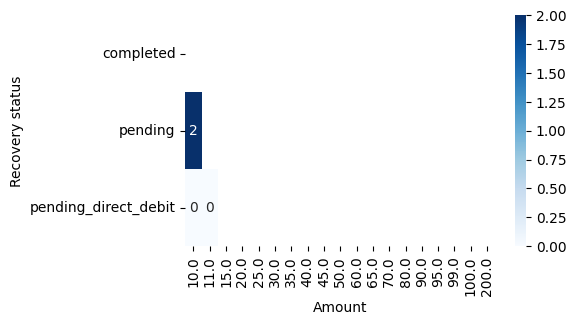

In [46]:
# Group by 'recovery_status' and 'reimbursement_range_weeks' and count the number of users in each group
cohort_amounts = filtered_risk_cohort.groupby(['recovery_status', 'amount']).size().unstack()
pivot_amounts = filtered_risk_cohort.pivot_table(index='recovery_status', columns='amount', aggfunc='size', fill_value=0)

triangle = np.zeros_like(pivot_amounts, dtype=bool)
triangle[np.triu_indices_from(triangle)] = True


plt.figure(figsize=(5, 3))
sns.heatmap(pivot_amounts, annot=True, fmt='d', cmap='Blues', mask=triangle)

plt.xlabel('Amount')
plt.ylabel('Recovery status')
plt.show()



In [47]:
#as the heatmap returns not a usable information, we need to filter better to understand the data
max_amount = filtered_risk_cohort.groupby('recovery_status')['amount'].max()

print(max_amount)


recovery_status
completed               200.0
pending                 100.0
pending_direct_debit    100.0
Name: amount, dtype: float64


In [48]:
completed_over_100 = filtered_risk_cohort[(filtered_risk_cohort['recovery_status'] == 'completed') & (filtered_risk_cohort['amount'] > 100)]

num_users_completed_over_100 = len(completed_over_100)

print(num_users_completed_over_100) #we want to check if the user qty is high, this will affect to the total, if not, we can delete it 

#after printing we see that only 1 user (also, for completed status, was the one affecting the graphic

1


In [49]:
# so we filter and delete this user from our df
completed_over_100_index = filtered_risk_cohort[(filtered_risk_cohort['recovery_status'] == 'completed') & (filtered_risk_cohort['amount'] > 100)].index

filtered_risk_cohort.drop(completed_over_100_index, inplace=True)

#and nowm, we filter to show again if there is amounts with low users
amount_counts_by_status = filtered_risk_cohort.groupby('recovery_status')['amount'].value_counts()
print(amount_counts_by_status)




recovery_status       amount
completed             100.0     1522
                      50.0       639
                      25.0       200
                      70.0        23
                      80.0        17
                      20.0        16
                      60.0        15
                      30.0        10
                      40.0         8
                      90.0         6
                      10.0         4
                      45.0         2
                      11.0         1
                      15.0         1
                      35.0         1
                      65.0         1
                      95.0         1
pending               100.0      504
                      50.0       213
                      25.0       102
                      20.0         5
                      40.0         5
                      80.0         4
                      30.0         3
                      10.0         2
                      60.0         2
         

/tmp/ipykernel_20704/2129638722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_risk_cohort.drop(completed_over_100_index, inplace=True)


In [50]:
average_amount_by_status = filtered_risk_cohort.groupby('recovery_status')['amount'].mean()
print(average_amount_by_status)
#this is the avergae amount waiting to be reimbursed, and we need to check with the amount of user to understand the monetary impact of these incidents

recovery_status
completed               78.982975
pending                 76.714793
pending_direct_debit    82.500000
Name: amount, dtype: float64


In [51]:
total_amount_by_status = filtered_risk_cohort.groupby('recovery_status')['amount'].sum()
print("Total debt:",total_amount_by_status)


Total debt: recovery_status
completed               194851.0
pending                  64824.0
pending_direct_debit      1320.0
Name: amount, dtype: float64


### **Understanding the quantitative information of the picture** ###
Is not only the rate of incidents, is the amount of money that we cannot have back to the company. Depend on the total amoun of users/reimbursement this may affect to the cashflow

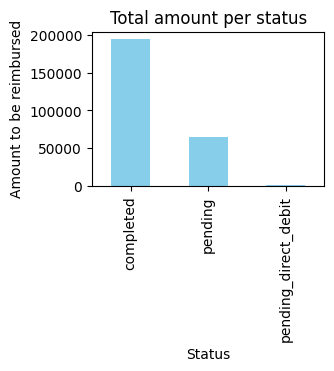

In [52]:
#graphics
plt.figure(figsize=(3, 2))
total_amount_by_status.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas
plt.title('Total amount per status')
plt.xlabel('Status')
plt.ylabel('Amount to be reimbursed')

plt.show()

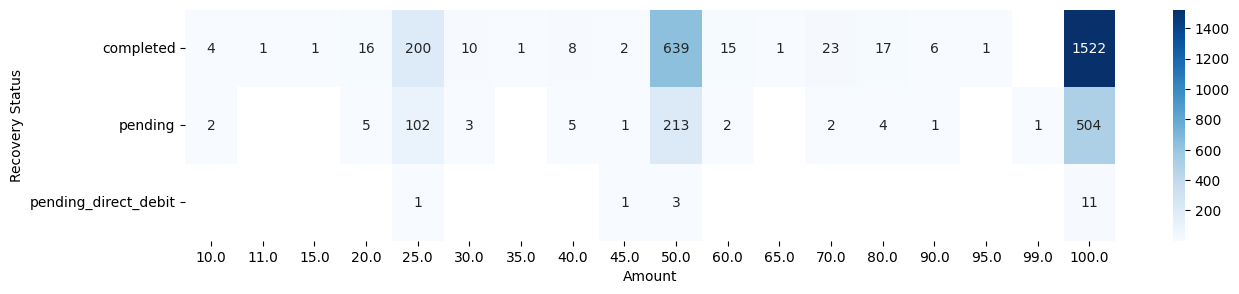

In [53]:
heatmap_data = amount_counts_by_status.unstack()

plt.figure(figsize=(15, 3))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Blues')

plt.xlabel('Amount')
plt.ylabel('Recovery Status')
plt.show()

recovery_status       amount
completed             100.0     1522
                      50.0       639
                      25.0       200
                      70.0        23
                      80.0        17
                      20.0        16
                      60.0        15
                      30.0        10
                      40.0         8
                      90.0         6
pending               100.0      504
                      50.0       213
                      25.0       102
pending_direct_debit  100.0       11
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

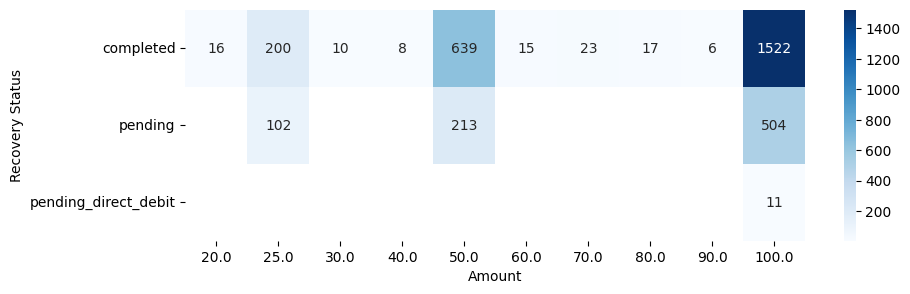

In [120]:
#we prefer to check and clean the data to see the most representative values
completed_filtered = filtered_risk_cohort[(filtered_risk_cohort['recovery_status'] == 'completed') & (filtered_risk_cohort['amount'] > 100)]

#Then, we obtain the amounts with 5 or fewer people
amount_counts = completed_filtered['amount'].value_counts()
amounts_to_exclude = amount_counts[amount_counts <= 5].index
filtered_completed = completed_filtered[~completed_filtered['amount'].isin(amounts_to_exclude)]

# Filtered_completed now contains data for the "completed" status with amounts greater than 100 and with more than 5 people
amount_counts_by_status_filtered = amount_counts_by_status[amount_counts_by_status > 5]


print(amount_counts_by_status_filtered)
plt.figure(figsize=(10, 6))
heatmap_data = amount_counts_by_status_filtered.unstack()
heatmap_data = heatmap_data.sort_index(axis=1)

# 
plt.figure(figsize=(10, 3))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Amount')
plt.ylabel('Recovery Status')
plt.show()

In [129]:
recovery_status = ['completed', 'pending', 'pending_direct_debit']
average_time = [19.008509, 39.815385, 86.000000]
average_amount = [194851.0, 64824.0, 1320.0]

#new dataframe for grpahics
df_new = pd.DataFrame({'recovery_status': recovery_status,'average_time': average_time, 'average_amount': average_amount})

print(df_new)

        recovery_status  average_time  average_amount
0             completed     19.008509        194851.0
1               pending     39.815385         64824.0
2  pending_direct_debit     86.000000          1320.0


### **Integrating all the information to have a global vision**
The system is not perfect. The people is not perfect. We must try to bring some clarity to the details that will help us to improve

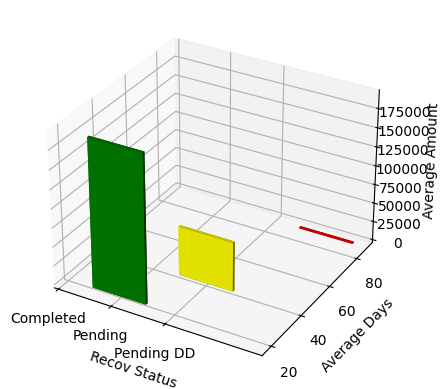

In [121]:
recovery_status = ['completed', 'pending', 'pending_direct_debit']
average_time = [19.008509, 39.815385, 86.000000]
average_amount = [194851.0, 64824.0, 1320.0]

#mapping
status_mapping = {'completed': 1, 'pending': 2, 'pending_direct_debit': 3}
x_values = [status_mapping[status] for status in recovery_status]


dx = np.ones_like(x_values) 
dy = np.ones_like(average_time) 
dz = average_amount 
colors = ['green', 'yellow', 'red']

# Crear figura y ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar las barras
for i in range(len(x_values)):
    ax.bar3d(x_values[i], average_time[i], 0, dx[i], dy[i], dz[i], color=colors[i])


#labels
ax.set_xlabel('Recov Status')
ax.set_xticks([0.5, 1.5, 2.5])
ax.set_xticklabels(['Completed', 'Pending', 'Pending DD'])
ax.set_ylabel('Average Days')
ax.set_yticks([20, 40, 60, 80])
ax.set_zlabel('Average Amount')


plt.show()

In [122]:
#According to the comparison, although those with pending DD take much longer than the rest to resolve the incident
#the amount is not representative, so no recovery effort should be devoted to it. 
#You have to focus on what has an average time and the most important amount to be able to apply actions

### **Focus on what is under the company's control**
Can we check if there are recurrent users that have incidents? is something about the system itself?is about the payment records of the user?
Can we establish a different policy on fees with penalties or compensation for time?

We should track these factors in order to don't let holes appear in the whole cashflow

Some ideas:
- extra fee when payment exceeds X days
- time penalty without allowing the same user to request an amount( or only up to a specific amount)
- amortization with 0% fee
- ...

We need more discussing about these points 